In [155]:
import pandas as pd
import matplotlib.pyplot as plt

[]

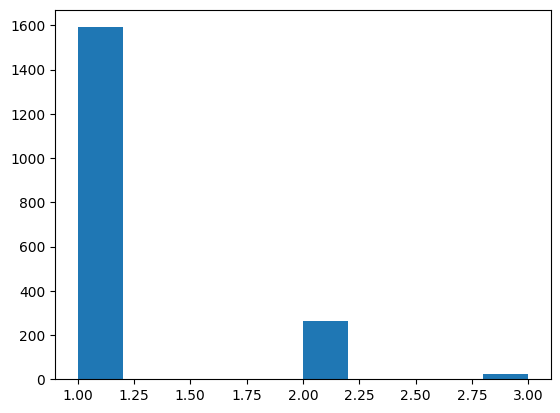

In [156]:
data = pd.read_csv("fusion.csv", sep=",")
plt.hist(data['Accident_Severity'])
plt.plot()

[]

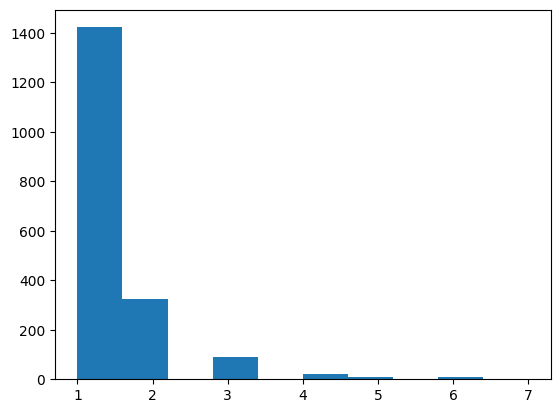

In [157]:
plt.hist(data['Number_of_Casualties'])
plt.plot()

[]

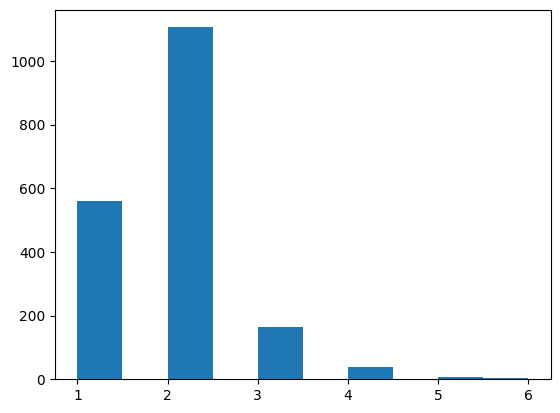

In [158]:
plt.hist(data['Number_of_Vehicles'])
plt.plot()

1) Remettre les variables telles qu'elles etaient: 
- Jours de la semaine
- Junction Control
- Junction Detail
- Road Type
- Vehicule Type
2) Les transformer en de multiples variables binaires
3) Calcul du VIF
- régression de Poisson sur la gravité de l'accident ?
Peuvent potentiellement servir de test de robustesse:
- régression simple sur le nomnbre de victime ?
- régression simple sur le nombre de véhicules ? 

-> qu'est ce qu'on cherche à démontrer? 
L'impact des conditions climatiques sur les accidents de voiture en Angleterre. 



1) Remettre les variabels telles qu'elles étaient
- Jours de la semaine
- Junction Control
- Junction Detail
- Road Type
- Vehicule Type

In [159]:
road_data = pd.read_csv('Road Accident Data.csv')

update_columns = ['Day_of_Week', 'Junction_Control', 'Junction_Detail', 'Road_Type', 'Vehicle_Type']

updated_df = data.merge(road_data[['Accident_Index'] + update_columns], 
                        on="Accident_Index", how="left", suffixes=('', '_new'))

for col in update_columns:
    updated_df[col] = updated_df[col + '_new'].combine_first(updated_df[col])

updated_df.drop(columns=[col + '_new' for col in update_columns], inplace=True)


In [160]:
len(updated_df)

1929

In [161]:
sum(updated_df['Junction_Control']=='Data missing or out of range')/len(updated_df)

0.3022291342664593

In [162]:
import numpy as np

updated_df['Junction_Control'] = updated_df['Junction_Control'].replace({
    'Data missing or out of range':np.nan 
}
)

In [163]:
updated_df['Junction_Detail'].unique()

array(['Not at junction or within 20 metres', 'Roundabout',
       'T or staggered junction', 'Crossroads', nan,
       'Private drive or entrance', 'More than 4 arms (not roundabout)',
       'Slip road', 'Other junction', 'Mini-roundabout'], dtype=object)

2) Traitement des variables en variables binaires

In [164]:
updated_df['Accident Date'] = pd.to_datetime(updated_df['Accident Date'])
updated_df['Year-Month'] = updated_df['Accident Date'].dt.to_period('M').astype(str)

# Encodage binaire (One-Hot Encoding)
binary_df = pd.get_dummies(updated_df['Year-Month'])
binary_df = binary_df.replace({
  "True":1,
  "False":0 
})




In [165]:
updated_df.combine_first(binary_df)


2021-01  2021-02  2021-03  2021-04  2021-05  2021-06  2021-07  2021-08  \
0       False    False    False    False    False     True    False    False   
1        True    False    False    False    False    False    False    False   
2       False    False    False    False    False    False     True    False   
3       False    False    False    False    False    False    False    False   
4       False    False    False    False     True    False    False    False   
5       False    False    False    False    False    False    False    False   
6       False    False    False     True    False    False    False    False   
7       False    False    False    False    False    False    False    False   
8       False    False    False    False    False    False    False    False   
9       False    False    False    False    False    False    False    False   
10      False    False    False    False    False    False    False    False   
11      False    False    False    False    False    False    False    False   
12      False    False    False    False    False    False    False    False   
13      False    False     True    False    False    False    False    False   
14      False    False    False    False    False    False    False    False   
15      False    False    False    False    False    False    False    False   
16      False    False    False    False    False    False    False    False   
17      False    False    False    False    False    False    False    False   
18      False    False    False    False    False    False    False    False   
19      False    False    False     True    False    False    False    False   
20      False    False    False    False    False    False    False    False   
21      False    False    False    False    False    False    False    False   
22      False    False    False    False    False    False    False    False   
23      False    False    False    False    False    False    False    False   
24      False    False    False    False    False    False    False    False   
25      False    False    False    False    False    False    False    False   
26      False    False    False    False    False    False    False    False   
27      False     True    False    False    False    False    False    False   
28      False    False    False    False    False    False    False    False   
29      False    False    False     True    False    False    False    False   
30      False    False     True    False    False    False    False    False   
31      False    False    False    False    False    False    False    False   
32      False    False    False    False    False    False    False    False   
33      False     True    False    False    False    False    False    False   
34      False    False    False    False    False    False    False    False   
35      False    False    False    False    False    False    False    False   
36      False    False    False    False    False    False    False    False   
37      False    False    False    False    False    False    False    False   
38      False    False    False    False    False    False    False    False   
39      False    False    False    False    False    False    False    False   
40      False    False    False    False    False    False    False    False   
41       True    False    False    False    False    False    False    False   
42      False    False    False    False    False    False    False     True   
43      False    False    False    False    False    False    False     True   
44      False    False    False    False    False    False    False    False   
45      False    False    False    False    False    False    False    False   
46      False    False    False    False    False     True    False    False   
47      False    False    False    False    False    False    False    False   
48      False     True    False    False    False    False    False    False   
49    

Traitement de la variable Time en plages horaires

In [166]:
import pandas as pd


updated_df['Time'] = pd.to_datetime(updated_df['Time'], format='%H:%M')

# Créer des catégories de tranches horaires
bins = [0, 6, 10, 15, 19, 24]  # Définition des tranches horaires
labels = ['Nuit', 'Matin', 'Midi', 'Après-midi', 'Soir']
updated_df['Time_Category'] = pd.cut(updated_df['Time'].dt.hour, bins=bins, labels=labels, include_lowest=True)


ValueError: time data "2024-12-10T17:05:00.000+01:00" doesn't match format "%H:%M", at position 0. You might want to try:
    - passing `format` if your strings have a consistent format;
    - passing `format='ISO8601'` if your strings are all ISO8601 but not necessarily in exactly the same format;
    - passing `format='mixed'`, and the format will be inferred for each element individually. You might want to use `dayfirst` alongside this.

In [106]:
updated_df.drop(columns=['Time','Accident Date','Date','Accident_Index','Local_Authority_(District)', 'Police_Force'], inplace=True)

In [107]:
data_encoded = pd.get_dummies(updated_df, columns=['Day_of_Week', 'Junction_Control', 'Junction_Detail', 'Road_Type', 'Vehicle_Type','Time_Category'], drop_first=False)

In [ ]:
pd.set_option('display.max_columns', None)
data_encoded.head()

Accident_Severity   Latitude  Light_Conditions  Longitude  \
0                1.0  51.360414               2.0   1.395073   
1                1.0  52.462860               1.0  -1.887075   
2                3.0  52.498658               2.0  -1.773410   
3                1.0  53.795663               0.0  -1.802003   
4                1.0  50.945826               2.0  -1.462045   

   Number_of_Casualties  Number_of_Vehicles  Road_Surface_Conditions  \
0                   1.0                 1.0                      1.0   
1                   1.0                 2.0                      2.0   
2                   1.0                 1.0                      1.0   
3                   1.0                 3.0                      1.0   
4                   2.0                 2.0                      1.0   

   Speed_limit  Urban_or_Rural_Area  DayLengthHours  MaxTemperature  \
0         30.0                  1.0       16.300000            19.9   
1         40.0                  1.0        8.166667             8.2   
2         30.0                  1.0       16.033333            27.9   
3         30.0                  1.0       10.450000             4.6   
4         30.0                  1.0       15.133333            12.3   

   MaxWindSpeed  MinTemperature  SolarRadiation  TotalPrecipitation  \
0          23.6            12.4           29.64                 0.0   
1          16.0             0.8            0.74                11.6   
2          10.4            15.4           23.59                 0.2   
3          36.1             2.0            7.06                 4.6   
4          18.4             2.2           20.51                 0.1   

  Year-Month  Day_of_Week_Friday  Day_of_Week_Monday  Day_of_Week_Saturday  \
0    2021-06               False                True                 False   
1    2021-01               False               False                 False   
2    2021-07               False               False                 False   
3    2022-02               False               False                 False   
4    2021-05               False               False                 False   

   Day_of_Week_Sunday  Day_of_Week_Thursday  Day_of_Week_Tuesday  \
0               False                 False                False   
1               False                 False                False   
2               False                 False                False   
3               False                 False                False   
4               False                  True                False   

   Day_of_Week_Wednesday  Junction_Control_Authorised person  \
0                  False                               False   
1                   True                               False   
2                   True                               False   
3                   True                               False   
4                  False                               False   

   Junction_Control_Auto traffic signal  \
0                                 False   
1                                 False   
2                                 False   
3                                 False   
4                                  True   

   Junction_Control_Give way or uncontrolled  \
0                                      False   
1                                       True   
2                                      False   
3                                      False   
4                                      False   

   Junction_Control_Not at junction or within 20 metres  \
0                                              False      
1                                              False      
2                                              False      
3                                              False      
4                                              False      

   Junction_Control_Stop sign  Junction_Detail_Crossroads  \
0                       False                       False   
1                       False              

In [127]:
print(data_encoded.isna().sum()[data_encoded.isna().sum() > 0])

Series([], dtype: int64)


In [ ]:
data_encoded = data_encoded.dropna()

In [123]:
data_encoded.describe()

Accident_Severity     Latitude  Light_Conditions    Longitude  \
count        1878.000000  1878.000000       1878.000000  1878.000000   
mean            1.166134    52.480515          1.666667    -1.326518   
std             0.406504     1.307436          0.606892     1.346907   
min             1.000000    50.048309          0.000000    -6.765089   
25%             1.000000    51.487627          1.000000    -2.200465   
50%             1.000000    52.230320          2.000000    -1.315775   
75%             1.000000    53.418447          2.000000    -0.193154   
max             3.000000    57.986367          2.000000     1.749183   

       Number_of_Casualties  Number_of_Vehicles  Road_Surface_Conditions  \
count           1878.000000         1878.000000              1878.000000   
mean               1.354633            1.847710                 1.420128   
std                0.771017            0.710094                 0.697632   
min                1.000000            1.000000                 1.000000   
25%                1.000000            1.000000                 1.000000   
50%                1.000000            2.000000                 1.000000   
75%                1.000000            2.000000                 2.000000   
max                7.000000            6.000000                 5.000000   

       Speed_limit  Urban_or_Rural_Area  DayLengthHours  MaxTemperature  \
count  1878.000000          1878.000000     1878.000000     1878.000000   
mean     39.558040             0.630990       12.325985       14.219702   
std      14.582325             0.482665        3.119330        6.168111   
min      20.000000             0.000000        7.000000       -2.200000   
25%      30.000000             0.000000        9.350000        9.800000   
50%      30.000000             1.000000       12.466667       14.400000   
75%      50.000000             1.000000       15.283333       18.600000   
max      70.000000             1.000000       17.933333       37.500000   

       MaxWindSpeed  MinTemperature  SolarRadiation  TotalPrecipitation  
count   1878.000000     1878.000000     1878.000000         1878.000000  
mean      21.799947        7.452929       11.010000            2.259478  
std        8.316257        5.273825        7.626071            4.099210  
min        6.300000       -8.500000        0.360000            0.000000  
25%       15.800000        3.300000        4.132500            0.000000  
50%       20.600000        7.800000        9.970000            0.500000  
75%       26.600000       11.800000       16.897500            2.600000  
max       55.600000       19.900000       29.830000           35.200000

Pour traiter les variables latitudes et longitude j'utilise une méthode d'ensemble learning pour regrouper les accidents en clusters géographiques 